In [1]:
# !pip install textblob
# !pip install tweepy
# !pip install -U kaleido

# To collecte the tweet data of the Face mask, clean the dataset, Lemmatizer, sentiment analysis and the EDA on the tweet dataset

## Load the basic function libraries

In [2]:
#Import the basic function libraries
import sys #Load the system in to enviroment
import snscrape.modules.twitter as sntwitter #For scrapping the tweets
import itertools#basic itrative library

import pandas as pd #For the database creation
import numpy as np #For the matrix operation
import os#Load the os in the enveroments
import pycountry
import re
import string#Basic strings for the text data
import datetime as dt #Load the

#Load the plotting and the 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sn
from PIL import Image

### Load the Sentiment analysis and the text extraction libraries

In [3]:
import nltk #NLP library
from textblob import TextBlob #Sentiemtn analysis libray
from wordcloud import WordCloud, STOPWORDS#NLP models for process text dataset
from nltk.sentiment.vader import SentimentIntensityAnalyzer#setiment analyzer tool
from langdetect import detect #to detect the language of the tweet
from nltk.stem import SnowballStemmer#For create a steaming
from sklearn.feature_extraction.text import CountVectorizer #For the counter vectorizer the dataset

In [4]:
#Down load some of the pre-trained 
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

#Load the NLP tokenzer and pre-process data libraries
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dhrupad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dhrupad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhrupad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dhrupad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Clean the tweets

In [5]:
#Clean the tweets
def clean_Txt(tweets):
    tweets = tweets.lower()#Convert the upper capital latter to the small later
    tweets = re.sub("'","",tweets)#To avoid the removeing contractions in english
    tweets = re.sub('@[A-Za-z0–9]+', '', tweets) #Remove the @mentions
    tweets = re.sub('#', '', tweets) # Remove the '#' hash tag
    tweets = re.sub('RT[\s]+', '', tweets) # Remove the retweets from tweets
    tweets = re.sub('https?:\/\/\S+', '', tweets) # Remove the hyperlinks from tweets
    tweets = re.sub('\[.*?\]',' ',tweets)#Remove the pantucaiton from the tweets
    #Tokenize the tweets 
    tweets = tweets.split()
    #Remove the stop words from the tweets
    stopwords = set(STOPWORDS)
    tweets = [w for w in tweets if not w in stopwords]
    tweets = " ".join(word for word in tweets)
    return tweets

In [6]:
#Create a world cloud based max word used in tweet visulisaiton
def word_cloud(text):
    stopword = set(STOPWORDS)#Process if any stop word is their in data
    allWords = ''.join([twts for twts in text]) #Combine the all word data
    #Basic bacground of the plot and artistic changes
    wordCloud = WordCloud(background_color='white', width = 1800,
                         height = 900, stopwords=stopword,
                         min_font_size=18, max_font_size=160,
                         colormap='prism').generate(allWords)
    fig,ax = plt.subplots(figsize=(20,10), facecolor='k')#Figue dimentions
    plt.imshow(wordCloud)
    ax.axis('off')
    fig.tight_layout(pad=0)
    plt.show()

## Lemmatization of the tweets dataset 
Before we apply the lemmatization on the tweets dataset we are jut need to create the POS tagging in the tweets dataset which lead to lemmatization process. in the lemmatization process weare adding the adjetives, verbs, nouns,adjoints and likn those informtion with the tweets

In [7]:
#Create a funciton for the data POS
#POS tagger directory
pos_dir = {'J':wordnet.ADJ, 'V':wordnet.VERB, 
           'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tagg = pos_tag(word_tokenize(text))
    new_list=[]
    for word, tag in tagg:
        #Filter only the english word from the tweets and avoid the other langues
        if word.lower() not in set(stopwords.words('english')):
            new_list.append(tuple([word,pos_dir.get(tag[0])]))
            
    return new_list

In [8]:
#Create a funciton to apply the lemmatizer
word_lemmatizer = WordNetLemmatizer()
def lemmatizer(pos_dataset):
    lemma_rew = ""
    for word,pos in pos_dataset:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew+""+lemma
        else:
            lemma = word_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew+""+lemma
            
    return lemma_rew

## Sentiment analysis using the TextBlob

In [9]:
#Calculate the subjectivity
def get_subjective(tweet_content):
    return TextBlob(tweet_content).sentiment.subjectivity
    #Calculate the polarity
def get_polarity(tweet_content):
    return TextBlob(tweet_content).sentiment.polarity

In [10]:
#Create a review socre of the model
def analysis_score(score):
    if score <0:#Function for the negative tweets
        return -1
    elif score == 0:#Funciton for the neutral tweets
        return 0
    else:#Funciton for the positive tweets
        return 1

## Collecte the Lockdown information dataset

In [11]:
# df_lockdown = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
#     'lockdown near:"Perth" within:5000km since:2020-03-01 until:2020-10-31').get_items(), 100000))[['date', 'content']]

In [12]:
# df_lockdown

In [14]:
# df_lockdown.to_csv('lockdown_senti.csv', index=False) #Store the collected tweets into local system 

NameError: name 'df_lockdown' is not defined

In [15]:
df_lockdown = pd.read_csv('lockdown_senti.csv')#Call back and store the collected raw tweet dataset

In [16]:
df_lockdown.head()#First glance at the dataset

date  \
0  2020-10-30 23:56:05+00:00   
1  2020-10-30 23:48:39+00:00   
2  2020-10-30 23:32:28+00:00   
3  2020-10-30 23:26:27+00:00   
4  2020-10-30 21:58:31+00:00   

                                             content  
0  Lockdown works in the short term. But is it ul...  
1  Just to finish off Inktober2020 with a smile. ...  
2  Lmao Melb defs going into a 3rd and 4th lockdo...  
3  I'm sorry, Britain.  Boris had failed you all ...  
4  @JCreatureTravel I wish more people thought li...

## Clean the dataset

In [17]:
#applying this function to Text column of our dataframe
df_lockdown["content"] = df_lockdown["content"].apply(clean_Txt)

### Plot the face mask tweet data

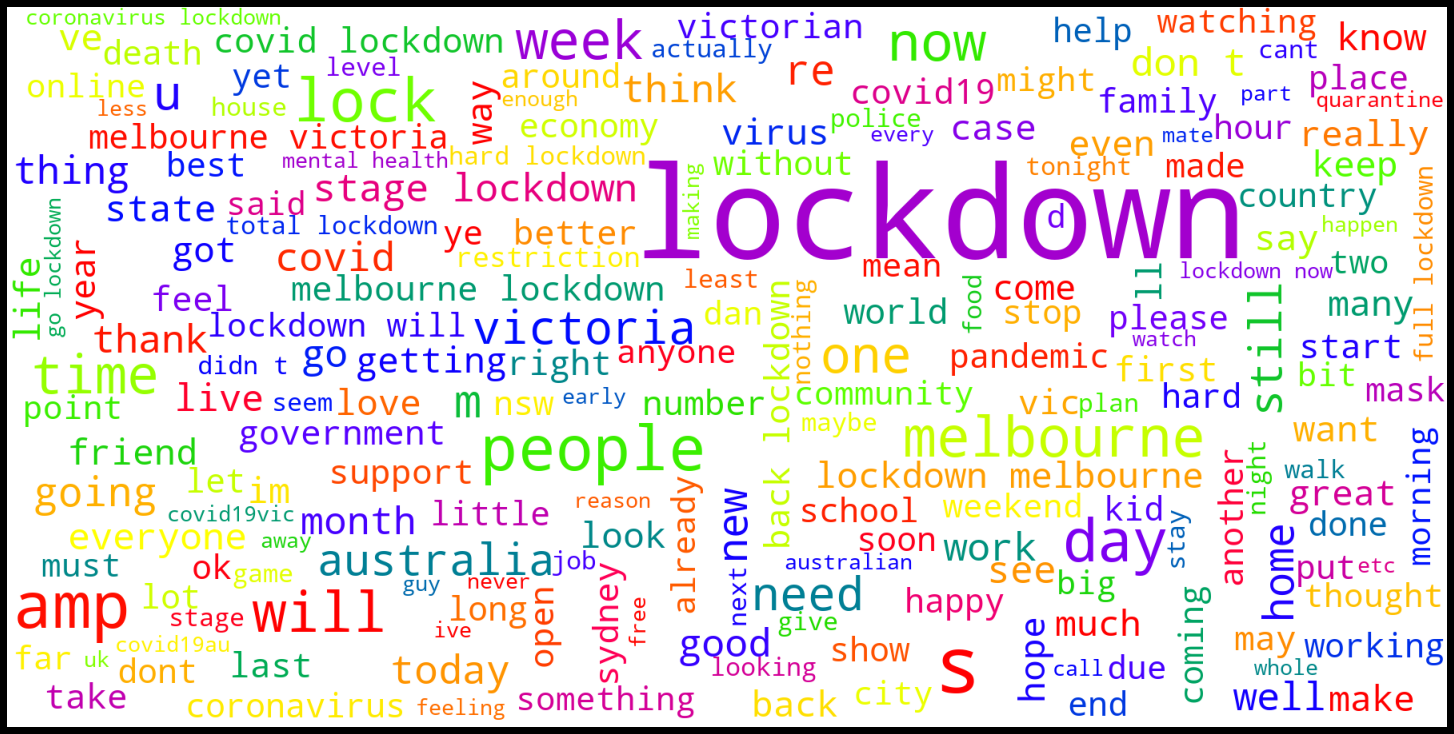

In [18]:
#Create a total word collected plot in the tweets
word_cloud(df_lockdown['content'].values)#Plot the tweets most utilised words into plot larger the word size more utilised the word

## Lemmatization of the tweet dataset

In [19]:
#For the lemmatization of the dataset first of the dataset is pos tagged to avoid the linguestic error in the dataset
df_lockdown['POS_tagged'] = df_lockdown['content'].apply(token_stop_pos)

In [20]:
#Colleted the lemmatizer data of the face mask based on the pos tagged dataset of the tweets
df_lockdown['Lemma'] = df_lockdown['POS_tagged'].apply(lemmatizer)

In [21]:
df_lockdown.head()

date  \
0  2020-10-30 23:56:05+00:00   
1  2020-10-30 23:48:39+00:00   
2  2020-10-30 23:32:28+00:00   
3  2020-10-30 23:26:27+00:00   
4  2020-10-30 21:58:31+00:00   

                                             content  \
0  lockdown works short term. ultimately best str...   
1  finish inktober2020 smile. thank reacted, comm...   
2  lmao melb defs going 3rd 4th lockdown. people ...   
3  im sorry, britain. boris failed again. 4 weeks...   
4  wish people thought you. it’s really awful see...   

                                          POS_tagged  \
0  [(lockdown, a), (works, v), (short, a), (term,...   
1  [(finish, a), (inktober2020, n), (smile, n), (...   
2  [(lmao, n), (melb, n), (defs, v), (going, v), ...   
3  [(im, n), (sorry, n), (,, None), (britain, n),...   
4  [(wish, a), (people, n), (thought, v), (., Non...   

                                               Lemma  
0  lockdownworkshortterm.ultimatelybeststrategylo...  
1  finishinktober2020smile.thankreact,comment,sha...  
2          lmaomelbdefsgo3rd4thlockdown.peoplefully’  
3  imsorry,britain.borisfail.4weeksagesayimplemen...  
4  wishpeoplethink.’reallyawfulseemanycasedeath.e...

In [22]:
#Collect the sentiment and score of sentiment based on the function defined earlier
df_lockdown['Polarity'] = df_lockdown['Lemma'].apply(get_polarity)

In [23]:
df_lockdown['Sentiment'] = df_lockdown['Polarity'].apply(analysis_score) #Collect the sentiment positive, negative and neutral

In [24]:
df_lockdown.to_csv('lockdwon_sentiment_score.csv', index=False) #Store the collected tweets into local system 

In [25]:
#Count the numbers of tweets setiments are belong to each catagories
xx = df_lockdown['Sentiment'].value_counts()
print('Total number of samples in each class:\n', xx)

Total number of samples in each class:
  0    13286
 1      137
-1       90
Name: Sentiment, dtype: int64


# Exploratry data analysis on  lockdown dataset

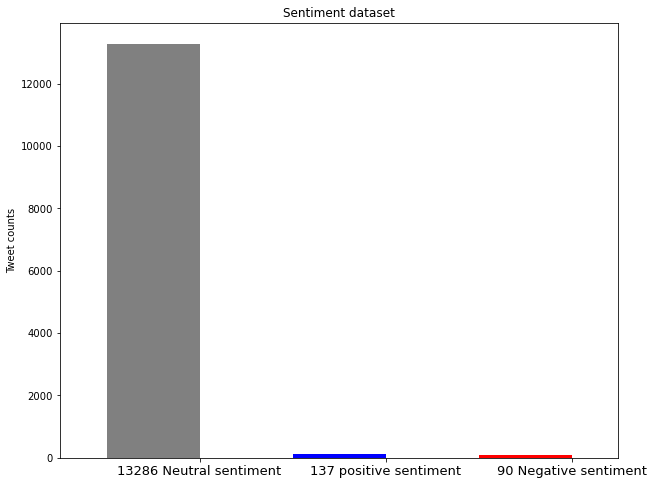

In [26]:
def bar_plot(bar_var):
    plt.figure(figsize=(10,8)) # figure dimension
    title = "Sentiment dataset" # title of plot
    c = ['gray', 'blue', 'red']
    plot=bar_var.plot.bar(color = c) # bar
    tweet_type = ['13286 Neutral sentiment', '137 positive sentiment', '90 Negative sentiment']
#     plt.legend(tweet_type,loc=1)
    plt.ylabel("Tweet counts")
    plt.title(title)
    barWidth = 0.25
    plt.xticks([r + barWidth for r in range(len(bar_var))],tweet_type, fontsize=13, rotation=360)
#Create a bar chart
bar_plot(xx)

In [27]:
# Split the sentment dataset and analysed the postive negative and nutral sentmetn sepratly
def senti_count(x):
    _lower=df_lockdown.loc[df_lockdown.Sentiment >= x]
    _high = pd.DataFrame(_lower)
    _perf=_high.loc[_high['Sentiment'] <= x]
    return(_perf)

In [28]:
#Analysed the dataset based on the montly tweets done psitve, negative and neutrals
def tweets_monthly_count(senti_database):
    by_monthly = pd.to_datetime(senti_database['date']).dt.to_period('M').value_counts().sort_index()
    by_monthly.index = pd.PeriodIndex(by_monthly.index)
    df_monthly = by_monthly.rename_axis('month').reset_index(name='counts')
    return df_monthly

## Monthly data visulisation

In [29]:
#Process the all tweet dataset
all_tweets_eda = tweets_monthly_count(df_lockdown)

#Visulisaed the dataset
fig = go.Figure(data=go.Scatter(x=all_tweets_eda['month'].astype(dtype=str), 
                                y=all_tweets_eda['counts'],
                                marker_color='Blue', text="counts"))
fig.update_layout({"title": 'Total tweets about Lockdown from fab 2020 to dec 2020',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total tweets"},
                   "showlegend": False})
fig.show()

fig = go.Figure(data=go.Bar(x=all_tweets_eda['month'].astype(dtype=str), 
                            y=all_tweets_eda['counts'],
                            marker_color='Blue', text=''))
fig.update_layout({"title": 'Tweets about Lockdown from fab 2020 to dec 2020',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total tweets"},
                   "showlegend": False})

fig.show()

C:\Users\Dhrupad\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


### Positive sentimetn tweets count

In [30]:
#Process the dataset
pos_senti = senti_count(1)
pos_senti_count = tweets_monthly_count(pos_senti)

#Visulisaed the dataset
fig = go.Figure(data=go.Scatter(x=pos_senti_count['month'].astype(dtype=str), 
                                y=pos_senti_count['counts'],
                                marker_color='Green', text="counts"))
fig.update_layout({"title": 'Positive Tweets about Lockdown from fab 2020 to dec 2020',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total positve tweets"},
                   "showlegend": False})
fig.show()
fig = go.Figure(data=go.Bar(x=pos_senti_count['month'].astype(dtype=str), 
                            y=pos_senti_count['counts'],
                            marker_color='Green', text=''))
fig.update_layout({"title": 'Positive Tweets about Lockdown from fab 2020 to dec 2020',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total positive tweets"},
                   "showlegend": False})

fig.show()

C:\Users\Dhrupad\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [31]:
neg_senti = senti_count(-1)
neg_sent_count = tweets_monthly_count(neg_senti)

#Visulisaed the dataset
fig = go.Figure(data=go.Scatter(x=neg_sent_count['month'].astype(dtype=str), 
                                y=neg_sent_count['counts'],
                                marker_color='red', text="counts"))
fig.update_layout({"title": 'Negative Tweets about Lockdown from fab 2020 to dec 2020',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total negative tweets"},
                   "showlegend": False})
fig.show()
fig = go.Figure(data=go.Bar(x=neg_sent_count['month'].astype(dtype=str), 
                            y=neg_sent_count['counts'],
                            marker_color='red', text=''))
fig.update_layout({"title": 'Negative Tweets about Lockdown from fab 2020 to dec 2020',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total negative tweets"},
                   "showlegend": False})

fig.show()

C:\Users\Dhrupad\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [32]:
net_senti = senti_count(0)
neut_senti_count = tweets_monthly_count(net_senti)

#Visulisaed the dataset
fig = go.Figure(data=go.Scatter(x=neut_senti_count['month'].astype(dtype=str), 
                                y=neut_senti_count['counts'],
                                marker_color='Gray', text="counts"))
fig.update_layout({"title": 'Neutral Tweets about Lockdown from fab 2020 to dec 2020',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total neutrel tweets"},
                   "showlegend": False})
fig.show()
fig = go.Figure(data=go.Bar(x=neut_senti_count['month'].astype(dtype=str), 
                            y=neut_senti_count['counts'],
                            marker_color='gray', text=''))
fig.update_layout({"title": 'Neutral Tweets about Lockdown from fab 2020 to dec 2020',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total neutrel tweets"},
                   "showlegend": False})

fig.show()

C:\Users\Dhrupad\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

